## Pre Processing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('data latihan4.xlsx')
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,45,Local-gov,164427,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0,0,40,United-States,<=50K
1,38,Private,91039,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024,0,60,United-States,>50K
2,40,Private,347934,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
3,46,Federal-gov,371373,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,<=50K
4,35,Private,32220,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Female,0,0,60,United-States,<=50K
5,34,Private,187251,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0,0,25,United-States,<=50K
6,33,Private,178107,Bachelors,13,Never-married,Craft-repair,Own-child,White,Male,0,0,20,United-States,<=50K
7,41,Private,343121,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0,0,36,United-States,<=50K
8,20,Private,262749,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States,<=50K
9,23,Private,403107,5th-6th,3,Never-married,Other-service,Own-child,White,Male,0,0,40,El-Salvador,<=50K


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         300 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    300 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [4]:
data = data.replace(' ?', np.nan)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         281 non-null object
fnlwgt            300 non-null int64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        281 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null int64
capital-loss      300 non-null int64
hours-per-week    300 non-null int64
native-country    295 non-null object
type              300 non-null object
dtypes: int64(6), object(9)
memory usage: 35.2+ KB


In [6]:
Y = ['type']
X_int = ['age', 'education-num']
X_float = ['fnlwgt','capital-gain','capital-loss','hours-per-week']
X_cat = ['workclass', 'education','marital-status','occupation','relationship','race','sex','native-country']

In [7]:
data_Y=data[Y]
data_int = data[X_int]
data_float = data[X_float].astype(float)
data_cat=data[X_cat]

In [8]:
print(data_Y['type'].unique())

[' <=50K' ' >50K']


## Imputasi

In [9]:
data_cat_array = []
for class_name in data_Y['type'].unique():
    data_cat_1 = data_cat[data_Y['type']==class_name]
    data_cat_clean_1 = data_cat_1.where(pd.notnull(data_cat_1), data_cat_1.mode(), axis='columns')
    data_cat_array.append(data_cat_clean_1)

In [10]:
data_cat_clean = pd.concat(data_cat_array)

In [11]:
data_cleaned = pd.concat([data_Y,data_int,data_float, data_cat_clean], axis=1)

In [12]:
data_cleaned

,type,age,education-num,fnlwgt,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,<=50K,45,13,164427.0,0.0,0.0,40.0,Local-gov,Bachelors,Divorced,Prof-specialty,Unmarried,White,Female,United-States
1,>50K,38,13,91039.0,15024.0,0.0,60.0,Private,Bachelors,Married-civ-spouse,Sales,Husband,White,Male,United-States
2,<=50K,40,9,347934.0,0.0,0.0,35.0,Private,HS-grad,Never-married,Other-service,Not-in-family,White,Female,United-States
3,<=50K,46,9,371373.0,0.0,0.0,40.0,Federal-gov,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Male,United-States
4,<=50K,35,12,32220.0,0.0,0.0,60.0,Private,Assoc-acdm,Never-married,Exec-managerial,Not-in-family,White,Female,United-States
5,<=50K,34,9,187251.0,0.0,0.0,25.0,Private,HS-grad,Divorced,Prof-specialty,Unmarried,White,Female,United-States
6,<=50K,33,13,178107.0,0.0,0.0,20.0,Private,Bachelors,Never-married,Craft-repair,Own-child,White,Male,United-States
7,<=50K,41,9,343121.0,0.0,0.0,36.0,Private,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
8,<=50K,20,10,262749.0,0.0,0.0,40.0,Private,Some-college,Never-married,Machine-op-inspct,Own-child,White,Male,United-States
9,<=50K,23,3,403107.0,0.0,0.0,40.0,Private,5th-6th,Never-married,Other-service,Own-child,White,Male,El-Salvador


In [13]:
# rearrange columns position to default
data_cleaned = data_cleaned[data.columns]

In [14]:
#sebelum standardize
data_cleaned

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,type
0,45,Local-gov,164427.0,Bachelors,13,Divorced,Prof-specialty,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
1,38,Private,91039.0,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,15024.0,0.0,60.0,United-States,>50K
2,40,Private,347934.0,HS-grad,9,Never-married,Other-service,Not-in-family,White,Female,0.0,0.0,35.0,United-States,<=50K
3,46,Federal-gov,371373.0,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
4,35,Private,32220.0,Assoc-acdm,12,Never-married,Exec-managerial,Not-in-family,White,Female,0.0,0.0,60.0,United-States,<=50K
5,34,Private,187251.0,HS-grad,9,Divorced,Prof-specialty,Unmarried,White,Female,0.0,0.0,25.0,United-States,<=50K
6,33,Private,178107.0,Bachelors,13,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
7,41,Private,343121.0,HS-grad,9,Divorced,Adm-clerical,Unmarried,White,Female,0.0,0.0,36.0,United-States,<=50K
8,20,Private,262749.0,Some-college,10,Never-married,Machine-op-inspct,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K
9,23,Private,403107.0,5th-6th,3,Never-married,Other-service,Own-child,White,Male,0.0,0.0,40.0,El-Salvador,<=50K


In [15]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 0 to 299
Data columns (total 15 columns):
age               300 non-null int64
workclass         300 non-null object
fnlwgt            300 non-null float64
education         300 non-null object
education-num     300 non-null int64
marital-status    300 non-null object
occupation        300 non-null object
relationship      300 non-null object
race              300 non-null object
sex               300 non-null object
capital-gain      300 non-null float64
capital-loss      300 non-null float64
hours-per-week    300 non-null float64
native-country    300 non-null object
type              300 non-null object
dtypes: float64(4), int64(2), object(9)
memory usage: 37.5+ KB


## Standardize

In [16]:
from sklearn.preprocessing import StandardScaler

In [20]:
data_int['age'] = StandardScaler().fit(data_int[['age']]).transform(data_int[['age']])
data_int['education-num'] = StandardScaler().fit(data_int[['education-num']]).transform(data_int[['education-num']])
data_float['fnlwgt'] = StandardScaler().fit(data_float[['fnlwgt']]).transform(data_float[['fnlwgt']])
data_float['capital-gain'] = StandardScaler().fit(data_float[['capital-gain']]).transform(data_float[['capital-gain']])
data_float['capital-loss'] = StandardScaler().fit(data_float[['capital-loss']]).transform(data_float[['capital-loss']])
data_float['hours-per-week'] = StandardScaler().fit(data_float[['hours-per-week']]).transform(data_float[['hours-per-week']])

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


## Deteksi Outlier

In [21]:
data_num_w_class = pd.concat([data_int,data_float,data_Y], axis=1)

In [22]:
plt.rcParams['figure.figsize'] = (15.0, 10.0)

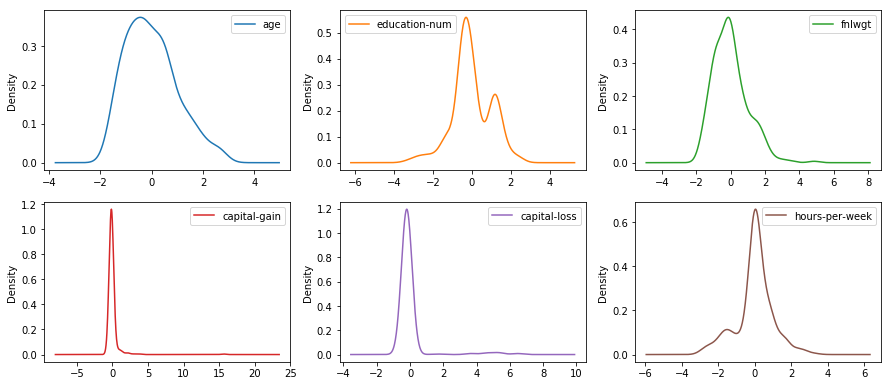

In [23]:
# Univariate Density Plots
data_num_w_class.plot(kind= 'density ' , subplots=True, layout=(3,3), sharex=False)
plt.show()

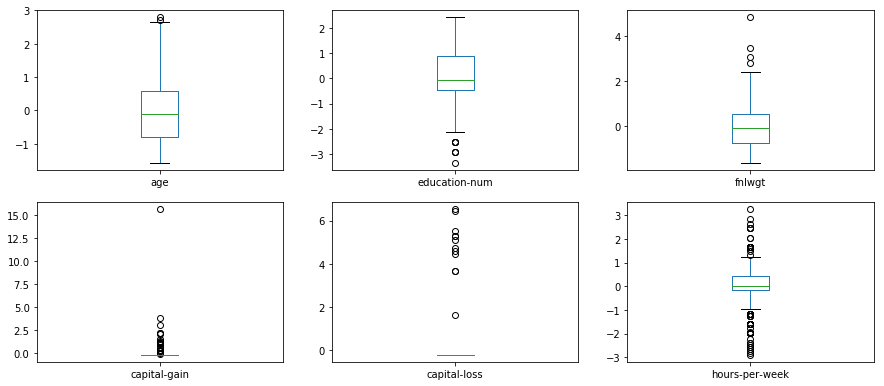

In [24]:
data_num_w_class.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

In [32]:
data_cleaned.to_csv('data latihan4new.csv', index=0)